In [24]:
import os
import sys
import glob
import csv
from typing import List
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

In [89]:
# Results to include in the plot
RESULT_PATHS = ['/BrainSeg/data/outputs/UNet_Zero_Pad_2019O-512-BSCCE_cp-003-0.8061',
                '/BrainSeg/data/outputs/UNet_Zero_Pad_2019O-512-BSCCE_cp-006-0.8025']

LEGEND_NAMES = ['UNet_2019O_512_BSCCE_cp-003-0.8061',
                'UNet_2019O_512_BSCCE_cp-006-0.8025']

CSV_PATHS = [glob.glob(os.path.join(p, 'results', '*.csv'))[0] for p in RESULT_PATHS]
CSV_PATHS

['/BrainSeg/data/outputs/UNet_Zero_Pad_2019O-512-BSCCE_cp-003-0.8061/results/20200621_235753.csv',
 '/BrainSeg/data/outputs/UNet_Zero_Pad_2019O-512-BSCCE_cp-006-0.8025/results/20200622_035030.csv']

In [31]:
# List available csv fieldnames
def list_csv_fieldnames(csv_path):
    with open(csv_path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        print(f'Fieldnames: {reader.fieldnames}')
        
list_csv_fieldnames(CSV_PATHS[0])

Fieldnames: ['Image Name', 'Gray-TP', 'Gray-FP', 'Gray-FN', 'Gray-TN', 'Gray-Accuracy (%)', 'Gray-Misclassification_Rate (%)', 'Gray-Sensitivity (%)', 'Gray-Specificity (%)', 'Gray-Precision (%)', 'Gray-Prevalence (%)', 'Gray-IoU (%)', 'White-TP', 'White-FP', 'White-FN', 'White-TN', 'White-Accuracy (%)', 'White-Misclassification_Rate (%)', 'White-Sensitivity (%)', 'White-Specificity (%)', 'White-Precision (%)', 'White-Prevalence (%)', 'White-IoU (%)', 'Back-TP', 'Back-FP', 'Back-FN', 'Back-TN', 'Back-Accuracy (%)', 'Back-Misclassification_Rate (%)', 'Back-Sensitivity (%)', 'Back-Specificity (%)', 'Back-Precision (%)', 'Back-Prevalence (%)', 'Back-IoU (%)', 'Pixel_Accuracy (%)', 'Mean_Accuracy (%)', 'Mean_IoU (%)', 'Frequency_Weighted_IoU (%)']


In [32]:
# Fieldname to plot of all images
FIELD_NAME = 'Mean_IoU (%)'

In [57]:
# Get fieldnames for all CSVs
def get_csv_field(csv_paths: List[str], field_name: str) -> "OrderedDict[str, OrderedDict[str, float]]":
    """Get data from field_name of csv_paths
        Inputs: 
            csv_paths  : List, CSV file paths
            field_name : str, field name to extract from csv_paths
        Outputs: 
            csv_data: Dictionary {csv_path: Dictionary {Image Name: field_value} }
    """
    def checkEqual(iterator):
        iterator = iter(iterator)
        try:
            first = next(iterator)
        except StopIteration:
            return True
        return all(first == rest for rest in iterator)
    
    csv_data = OrderedDict()
    
    for csv_path in csv_paths:
        with open(csv_path, newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            field_values = OrderedDict()
            for row in reader:
                field_values[row['Image Name']] = row[field_name]
        csv_data[csv_path] = field_values
    
    # Check if Image Names are the same in the same order
    assert checkEqual([csv.keys() for csv in csv_data.values()])
    
    return csv_data

In [74]:
csv_data = get_csv_field(CSV_PATHS, FIELD_NAME)
image_names = list(next(iter(csv_data.values())).keys())  # Extract image names from first CSV
image_names = [name.split('-')[0].replace('NA', '') for name in image_names]   # Leave only numbers for WSI

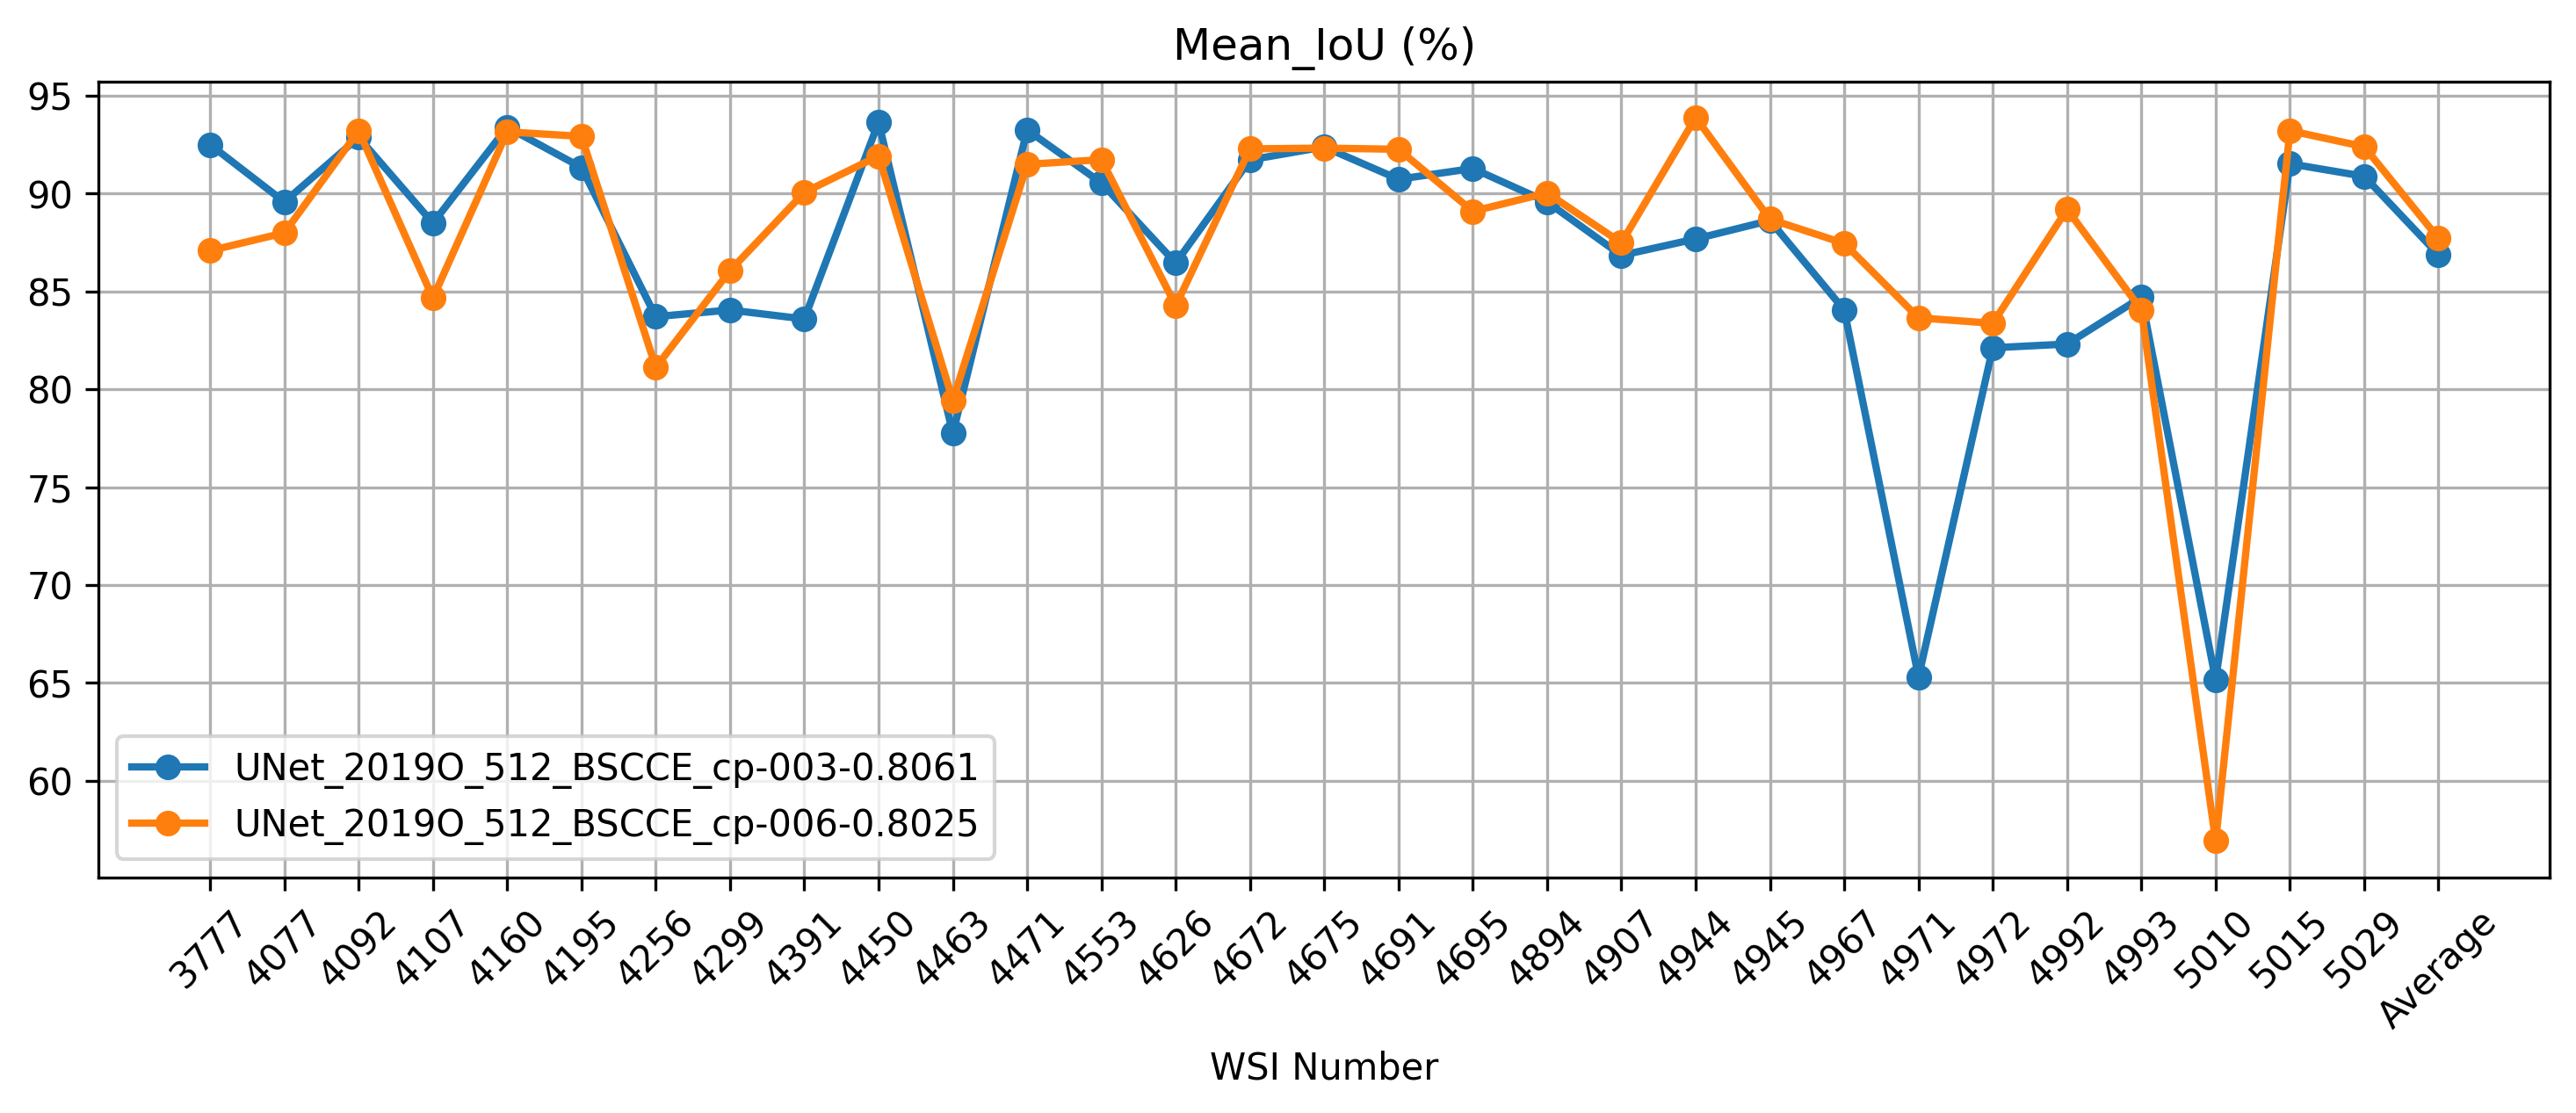

In [98]:
plt.figure(figsize=[12, 4], dpi=300)
for i, (csv_name, field_values) in enumerate(csv_data.items()):
    field_values = [float(v) for v in list(field_values.values())]
    plt.plot(field_values, 'o-', linewidth=2, label=LEGEND_NAMES[i])
    
plt.xlabel('WSI Number')
plt.xticks(range(0, 31), image_names, rotation=45)
plt.title(FIELD_NAME)
plt.grid()
plt.legend()